<a href="https://colab.research.google.com/github/NayeonKeum/SOLUX_summer_data/blob/master/3%EC%A3%BC%EC%B0%A8/%EC%B1%95%ED%84%B02_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
%matplotlib inline

In [31]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [32]:
question=pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/schema.csv')
question.shape

(290, 3)

In [33]:

mcq=pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/multipleChoiceResponses.csv',encoding="ISO-8859-1", low_memory=False)
mcq.shape


(16716, 228)

In [34]:
qc=question.loc[question['Column'].str.contains('JobFactor')]
print(qc.shape)
qc.Question.values

(16, 3)


array(['How are you assessing potential job opportunities? - Opportunities for professional development',
       'How are you assessing potential job opportunities? - The compensation and benefits offered',
       "How are you assessing potential job opportunities? - The office environment I'd be working in",
       "How are you assessing potential job opportunities? - The languages, frameworks, and other technologies I'd be working with",
       "How are you assessing potential job opportunities? - The amount of time I'd have to spend commuting",
       'How are you assessing potential job opportunities? - How projects are managed at the company or organization',
       'How are you assessing potential job opportunities? - The experience level called for in the job description',
       "How are you assessing potential job opportunities? - The specific department or team I'd be working on",
       "How are you assessing potential job opportunities? - The specific role or job title I'd 

In [35]:
job_factors=[x for x in mcq.columns if x.find('JobFactor')!=-1]

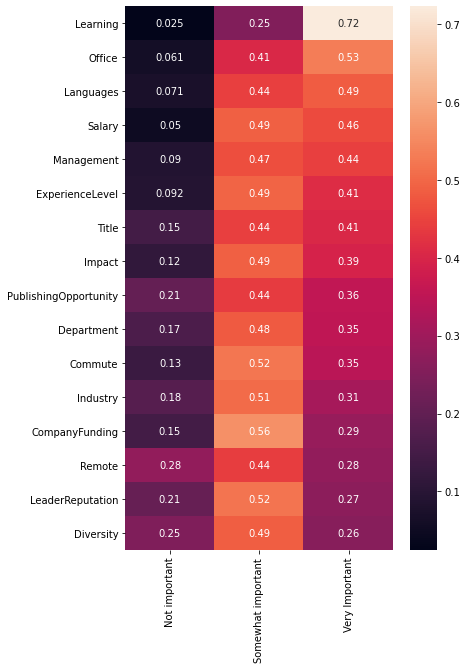

In [36]:
jfdf={}
for feature in job_factors:
  a=mcq[feature].value_counts()
  a=a/a.sum()
  jfdf[feature[len('JobFactor'):]]=a

jfdf=pd.DataFrame(jfdf).transpose()

plt.figure(figsize=(6,10))
sns.heatmap(jfdf.sort_values('Very Important', ascending=False), annot=True)
#1에 가까울수록 상관관계 증가

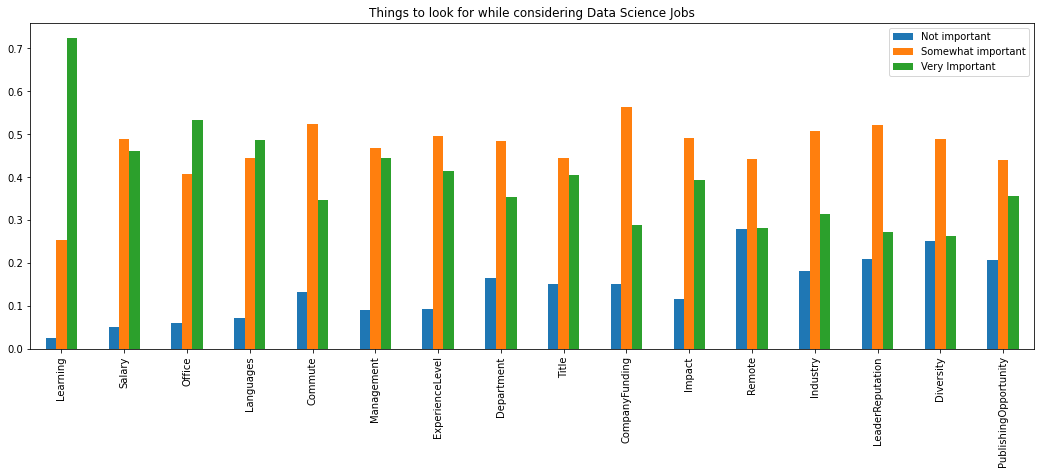

In [37]:
jfdf.plot(kind='bar', figsize=(18,6), title="Things to look for while considering Data Science Jobs")
plt.show()

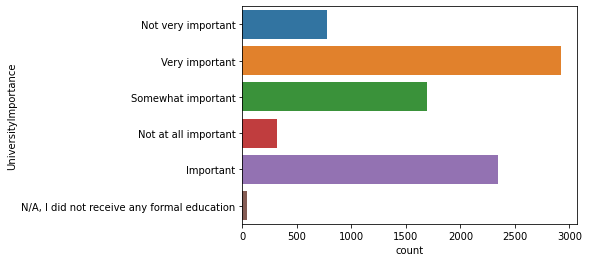

In [38]:
#학위 중요?
sns.countplot(y='UniversityImportance', data=mcq)

In [39]:
#연령대 별-2분20초~:왜 안될까??
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.figure_factory as fig_fact

top_uni = mcq['UniversityImportance'].value_counts().head(5)
top_uni_dist = []
for uni in top_uni.index:
    top_uni_dist.append(mcq[(mcq['Age'].notnull()) & (mcq['UniversityImportance'] == uni)]['Age'])

group_labels = top_uni.index

fig = fig_fact.create_distplot(top_uni_dist, group_labels, show_hist=False)
py.iplot(fig, filename='University Importance by Age')


In [40]:
#어디서 배워욥
mcq[mcq['FirstTrainingSelect'].notnull()].shape


(14712, 228)

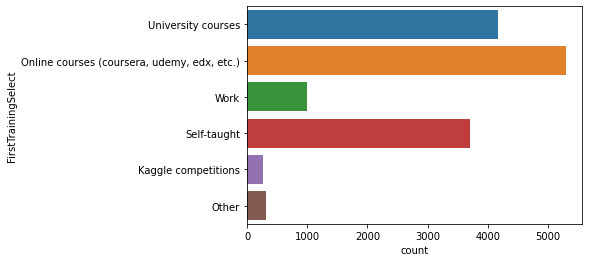

In [41]:
sns.countplot(y='FirstTrainingSelect', data=mcq)

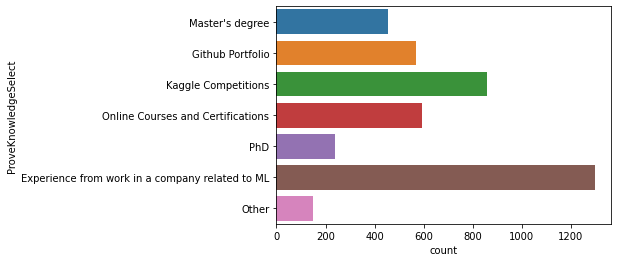

In [42]:
#resume 뭐가 중요
sns.countplot(y='ProveKnowledgeSelect', data=mcq)

In [43]:
#ml 알고 수학 알아야?
qc=question.loc[question['Column'].str.contains('AlgorithmUnderstandingLevel')]
qc


,Column,Question,Asked
227,AlgorithmUnderstandingLevel,At which level do you understand the mathemati...,CodingWorker


In [44]:
mcq[mcq['AlgorithmUnderstandingLevel'].notnull()].shape

(7410, 228)

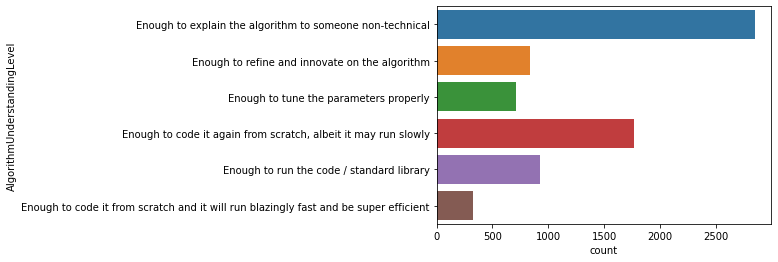

In [45]:
sns.countplot(y='AlgorithmUnderstandingLevel', data=mcq)

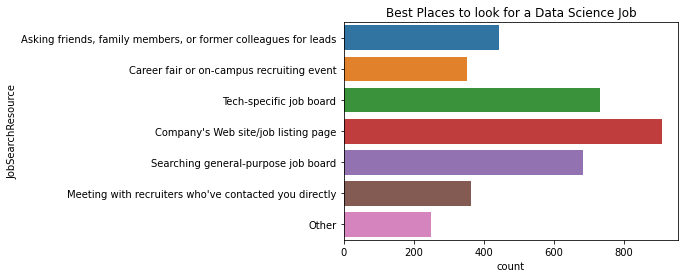

In [46]:
#직업 어디서?

plt.title("Best Places to look for a Data Science Job")
sns.countplot(y='JobSearchResource', data=mcq)

In [47]:
question.loc[question['Column'].str.contains('JobSearchResource|EmployerSearchMethod')]

,Column,Question,Asked
108,EmployerSearchMethod,How did you find your current job? - Selected ...,CodingWorker-NC
109,EmployerSearchMethodOtherFreeForm,How did you find your current job? - Some othe...,CodingWorker-NC
271,JobSearchResource,Which resource has been the best for finding d...,Learners
272,JobSearchResourceFreeForm,Which resource has been the best for finding d...,Learners


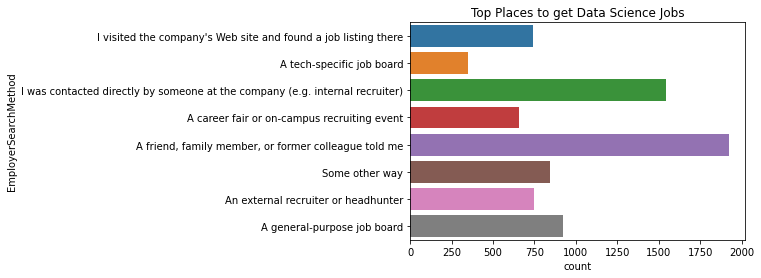

In [48]:
plt.title("Top Places to get Data Science Jobs")
sns.countplot(y='EmployerSearchMethod', data=mcq)

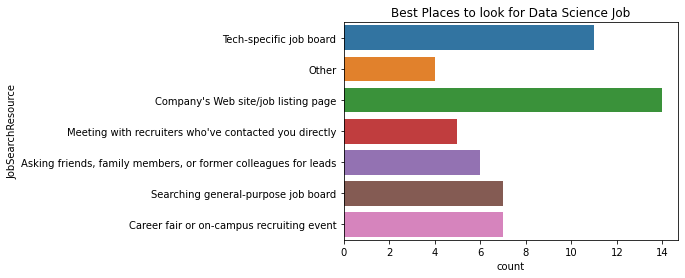

In [49]:
#한국사람들은?
korea=mcq.loc[(mcq['Country']=='South Korea')]

plt.title("Best Places to look for Data Science Job")
sns.countplot(y='JobSearchResource', data=korea)